# Bivariate-Analysis
Showing different methods of analysing the statistical and graphical significant difference between two variables.

    Part 4: Normality test
    Part 5: T-Test
    Part 6: U-Test
    Part 7: Chi-square test for two categorical variables
    Part 8: Chi-square test for each outcome of a categorical variable

# Imports & Read data

In [1]:
import sys
sys.path.insert(0, 'lib\\')
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot
from scipy.stats import ttest_ind
from scipy.stats import t
import Analyser

## Read data

In [2]:
df = pd.read_csv('data\\Facebook_Ads.csv', encoding='ISO-8859-1')

# Create Analyser object

In [3]:
myAnalyser = Analyser.Analyser()

# Normality test

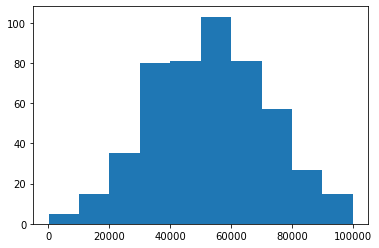

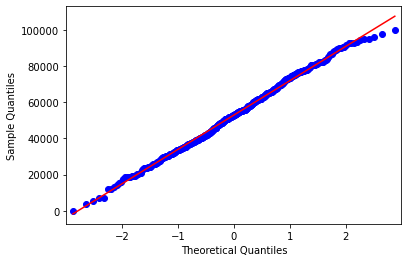

Alpha      = 0.05
p          = 0.0678809
Statistik  = 5.379999887156919
Sample looks Gaussian (fail to reject H0)


In [4]:
myAnalyser.normality_test(df['Salary'])

Further links:

 - https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
 - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html
 - https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f

# T-Test
The T-Test (parametric-test) is applied, if the assumption that the data comes from a normal-distribution can be hold up.

In [22]:
t_stat, p = ttest_ind(df[df['Clicked'] == 1]['Salary'], df[df['Clicked'] == 0]['Salary'])
print("p          = {:g}".format(p))
print("Statistik  =", t_stat)

p          = 2.19405e-62
Statistik  = 19.306771687842893


<AxesSubplot:xlabel='Clicked', ylabel='Salary'>

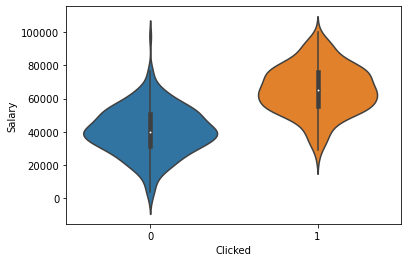

In [29]:
sns.violinplot(x='Clicked', y='Salary', data=df)

In [36]:
# https://towardsdatascience.com/a-complete-guide-to-confidence-interval-and-examples-in-python-ff417c5cb593

AttributeError: 't_gen' object has no attribute 't_test'

Further links:

 - https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f
 
 - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

# U-test
The U-Test (non-parametric-test) is an alternative to the t-test, if the assumption that the data comes from a normal-distribution can't be hold up 

['--------------------------------------------------------------------------------------',
 '----------------------------------------------------------------- OBSERVED FREQUENCIES',
    Clicked  Total
 0        0    249
 1        1    250,
 '-------------------------------------------------------------------- AVERGAE RANKSUMS',
 'Clicked = 0    E(sum(rank)) = 152.23',
 'Clicked = 1    E(sum(rank)) = 347.38',
 '                     E(sum(rank)) = 250.0',
 '------------------------------------------------------------------------- TEST RESULTS',
 'U-Statistik:     6781.0',
 'p-Value:         0.0 %',
 '-------------------------------------------------------------------------------- PLOT',
 <AxesSubplot:xlabel='Clicked', ylabel='Salary'>]

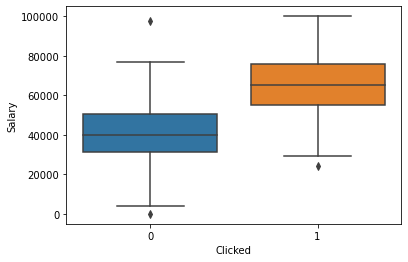

In [5]:
myAnalyser.mann_whitney_U_test(df['Clicked'], df['Salary'])

Salary has a significant impact wheather a user click an add or not (p_value of 0%), 
in general people with a higher salary  do click on the add  

# Chi-square test for two categorical variables
Non-parametric-test for two categorical variables.

['3 attributes',
 '--------------------------------------------------------------------------------------',
 '----------------------------------------------------------------- OBSERVED FREQUENCIES',
 '--------------------------------------------------------------------------------------',
            Salary_cat                 
 Salary_cat       high  low middle  All
 Clicked                               
 0                  11  194     44  249
 1                 141   34     75  250
 All               152  228    119  499,
 '--------------------------------------------------------------------------------------',
 '------------------------------------------------------ OBSERVED FREQUENCIES (relative)',
 '--------------------------------------------------------------------------------------',
            Salary_cat                       
 Salary_cat       high     low  middle    All
 Clicked                                     
 0                7.24   85.09   36.97   49.9
 1          

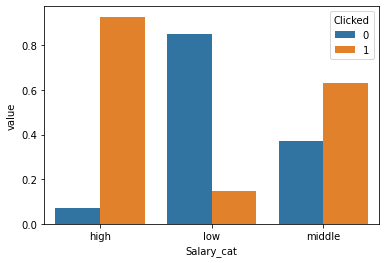

In [6]:
# apply Chi_Squared-Test 
df['Salary_cat'] = np.where(df['Salary'] < 51000, 'low',np.where(df['Salary'] < 63000, 'middle','high'))
myAnalyser.chi_squared_test(df['Clicked'], df['Salary_cat'])

Observed and expected figures differ significantly (p_value=0%). The two split values for binning the Salary-variable into three bins with 51K and 63K are the optimal values such that CramerV its maximum (see 
"Categorising-under-maximising-CramerV-using-HyperOpt.ipynb"). The high salary-category is extremely unbalanced with favouring "Clicked" whereas the low salary-category shows the exact counterpart.

# Chi-square test for each outcome of a categorical variable
Applying for each outcome of a categorical variable the Chi-square-test via outcome and the indicator-function.

In [7]:
myAnalyser.chi_square_test_for_each_category_level(df['Clicked'], df['Salary_cat'])

,AttrCharacteristic,AttrCharacteristicRenamed,ChiSq,p_value,CramerV
1,low,low,207.9290,0.0000,0.6455
0,high,high,159.1396,0.0000,0.5647
2,middle,middle,10.4421,0.0012,0.1447


The correlation measure CramerV verifies that the 'low and high salary' outcome has the most significant result with clicked.